# Anomaly detection - Gaussian approach

There are many ways to detect anomaly behaviour - one way is to use gaussian (normal) distribution.

Gaussian function shows that the vast majority of data is 'centered' and the rest is splitted equally. Any data that does not fit it can be marked as anomalous.

## Global imports

In [1]:
import numpy as np
from load_mat import load_mat
from matplotlib import pyplot as plt

## Gaussian function

### Formula

\begin{align}
f(x | \mu, \sigma^2) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - u)^2}{2\sigma^2}}
\end{align}

### Python function

In [18]:
def gaussian(x, mu, sigma):
    return (1 / (sqrt(2 * pi * sigma ** 2))) * (e ** -((x - mu) ** 2) / (2 * sigma ** 2))

### Visual representation

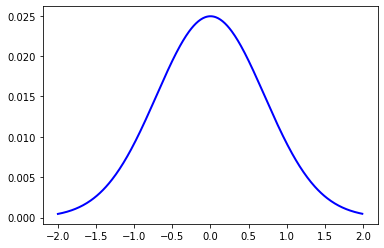

In [19]:
from gaussian import gaussian

mu, sigma = 0, 2
rand_z = rand_z = np.arange(-2., 2., 0.01)
calc_g = [gaussian(z, mu, sigma) for z in rand_z]
plt.plot(rand_z, calc_g, color='b', lw=2)

## Visualizing dataset

The file ***ex8data1.mat*** contains example dataset with records containing Latency (ms) and Throughput (mb/s). Before going any further we shall visualize the dataset.

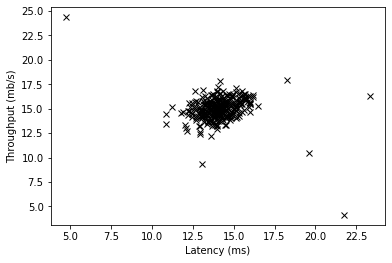

In [22]:
from plot_data import plot_data

x, x_val, y_val = load_mat('./data/ex8data1.mat', 'X', 'Xval', 'yval')
# Show scatter plot of all data points
plot_data(plt, x)

## Calculate formula parameters

As part of gaussian function, it is needed to calculate parameters *mu* and *sigma*.

The code responsible for calculating those parameters is located in ***estimate_gaussian.py***.

In [23]:
from estimate_gaussian import estimate_gaussian

mu, sigma2 = estimate_gaussian(x)
print(f"mu = {mu}. Sigma: {sigma2}")

mu = [14.11222578 14.99771051]. Sigma: [1.83263141 1.70974533]


## Multivariate gaussian

To calculate the gaussian value for multidimensional data, multivariate gaussian formula can be used.

\begin{align}
f(x | \mu, \Sigma) = \dfrac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}exp(-\dfrac{1}{2}(X - \mu)^{T}\Sigma^{-1}(X - \mu))
\end{align}

The corresponding python code can be found in ***multivariate_gaussian.py*** file.

With this formula and previously calculated mu and sigma, the outcome of the multivariate gaussian function can be found.

In [27]:
from multivariate_gaussian import multivariate_gaussian

p = multivariate_gaussian(x, mu, sigma2)
print(f"P size: {np.size(p)}")

P size: 307


## Plotting fit

By using mu, sigma and p predicting function can be drawn.

*Please note that plot_fit function will call multivariate_gaussian using generated meshgrid.*

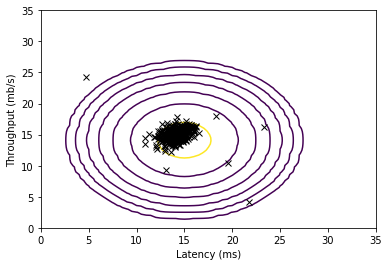

In [31]:
from plot_fit import plot_fit

plot_data(plt, x)
plot_fit(plt, mu, sigma2)

## Calculating epsilon using cross validation set

Epsilon is simply the *threshold* that will distinguish whether the dataset element is anomalous or not.

The function is a bit more complex and calculates the true positives, false positives and false negatives to find the best fitting epsilon value.

In [32]:
def select_threshold(y_val, p_val):
    best_epsilon = 0
    best_f1 = 0
    f1 = 0
    min_p_val = min(p_val)
    max_p_val = max(p_val)
    step_size = (max_p_val - min_p_val) / 1000
    for epsilon in np.arange(min_p_val, max_p_val, step_size):
        predicted_outcome = (p_val < epsilon)[:, np.newaxis]
        tp = np.sum(predicted_outcome[y_val == 1] == 1)
        fp = np.sum(predicted_outcome[y_val == 1] == 0)
        fn = np.sum(predicted_outcome[y_val == 0] == 1)
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        f1 = (2 * prec * rec) / (prec + rec)
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon
    return best_epsilon

In [36]:
from select_threshold import select_threshold

p_val = multivariate_gaussian(x_val, mu, sigma2)
epsilon = select_threshold(y_val, p_val)
print(f"Epsilon value: {epsilon}")

Epsilon value: 8.990852779269496e-05


## Selecting anomalous dataset elements

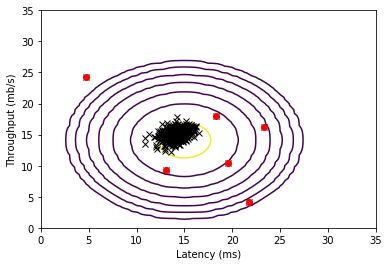

In [39]:
# Draw dataset
plot_data(plt, x)
# Draw fit
plot_fit(plt, mu, sigma2)
# Find outliers
outliers = np.where(p < epsilon)[0]
x_outliers = x[outliers]
# Draw outliers
plt.plot(x_outliers[:, 0], x_outliers[:, 1], 'ro')